In [21]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from scipy.signal import find_peaks
from scipy.signal import TransferFunction, step, impulse


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     s^2 - 5 s + 12
------------------------
s^3 + 12 s^2 + 41 s + 30



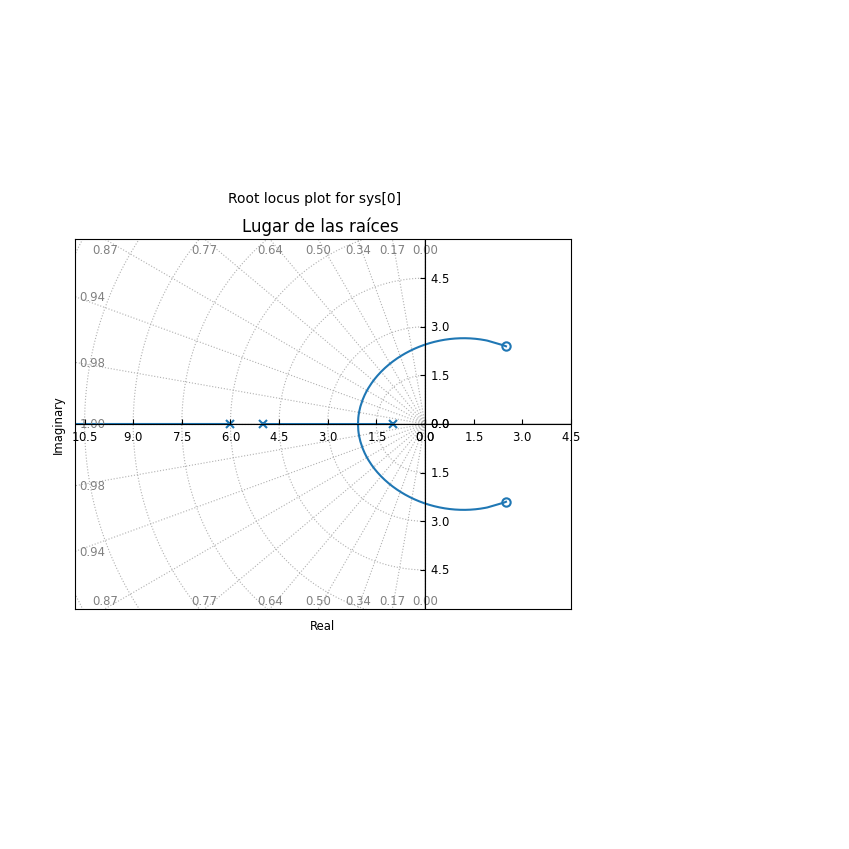

In [2]:
num = [1, -5, 12]          
den = np.polymul([1, 5], [1, 7, 6])  

G = ctrl.TransferFunction(num, den)
print(G)

plt.figure()
ctrl.root_locus(G)
plt.title('Lugar de las raíces ')
plt.grid(True)
plt.show()


# Sistema de Control - Análisis de Estabilidad

## 1. Ecuación característica del sistema de lazo cerrado

Para un sistema con realimentación unitaria:

$G(s) = \frac{K(s^2-5s+12)}{(s+5)(s^2+7s+6)}$

La **ecuación característica** es:

$$(s+5)(s^2+7s+6)+K(s^2-5s+12)=0$$

### Desarrollo del denominador:

1. **Expandir** $(s+5)(s^2+7s+6)$:
   
   Primero factorizamos: $s^2+7s+6 = (s+1)(s+6)$
   
   Entonces: $(s+5)(s+1)(s+6) = (s+5)(s^2+7s+6)$
   
   $(s+5)(s^2+7s+6) = s^3+7s^2+6s+5s^2+35s+30 = s^3+12s^2+41s+30$

2. **Sumar el término con** $K$:
   
   $$s^3+12s^2+41s+30+K(s^2-5s+12)=0$$
   
   $$s^3+(12+K)s^2+(41-5K)s+(30+12K)=0$$

## 2. Tabla de Routh-Hurwitz

La ecuación característica es:

$$s^3+(12+K)s^2+(41-5K)s+(30+12K)=0$$

### Coeficientes:

- $a_3 = 1$
- $a_2 = 12+K$
- $a_1 = 41-5K$
- $a_0 = 30+12K$

### Tabla de Routh para un polinomio cúbico:

| Potencia | Col 1 | Col 2 |
|----------|-------|-------|
| $s^3$ | $1$ | $41-5K$ |
| $s^2$ | $12+K$ | $30+12K$ |
| $s^1$ | $b_1$ | $0$ |
| $s^0$ | $c_1$ | |

Donde:

$$b_1 = \frac{(12+K)(41-5K) - 1 \cdot (30+12K)}{12+K}$$

$$c_1 = 30+12K$$

### Condición de estabilidad:

Para estabilidad, **todos los elementos de la primera columna deben ser positivos**:

- $a_3 = 1 > 0$ ✓
- $a_2 = 12+K > 0$ → $K > -12$
- $b_1 > 0$
- $c_1 = 30+12K > 0$ → $K > -\frac{30}{12} = -2.5$

### Cálculo de $b_1$:

$b_1 = \frac{(12+K)(41-5K) - (30+12K)}{12+K}$

Expandiendo el numerador:
$(12+K)(41-5K) - (30+12K) = 492 - 60K + 41K - 5K^2 - 30 - 12K$
$= 462 - 31K - 5K^2$

Por lo tanto:
$b_1 = \frac{462 - 31K - 5K^2}{12+K}$

## 3. Condiciones para la estabilidad

Para que el sistema sea estable, todos los elementos de la primera columna deben ser **positivos**:

### Condición 1: $12+K > 0$
$K > -12$

### Condición 2: $30+12K > 0$
$K > -\frac{30}{12} = -2.5$

### Condición 3: $b_1 > 0$
$\frac{462 - 31K - 5K^2}{12+K} > 0$

Para $K > -12$, el denominador $(12+K) > 0$, entonces necesitamos:
$462 - 31K - 5K^2 > 0$
$5K^2 + 31K - 462 < 0$

Resolviendo la ecuación cuadrática $5K^2 + 31K - 462 = 0$:
$K = \frac{-31 \pm \sqrt{31^2 + 4(5)(462)}}{2(5)} = \frac{-31 \pm \sqrt{961 + 9240}}{10} = \frac{-31 \pm \sqrt{10201}}{10}$
$K = \frac{-31 \pm 101}{10}$

Las raíces son:
- $K_1 = \frac{-31 - 101}{10} = -13.2$
- $K_2 = \frac{-31 + 101}{10} = 7$

Como la parábola abre hacia arriba, $5K^2 + 31K - 462 < 0$ para:
$-13.2 < K < 7$

## 4. Rango final de estabilidad

Combinando todas las condiciones:
- $K > -12$ (Condición 1)
- $K > -2.5$ (Condición 2)  
- $-13.2 < K < 7$ (Condición 3)

**El rango de K para la estabilidad es:**
$-2.5 < K < 7$

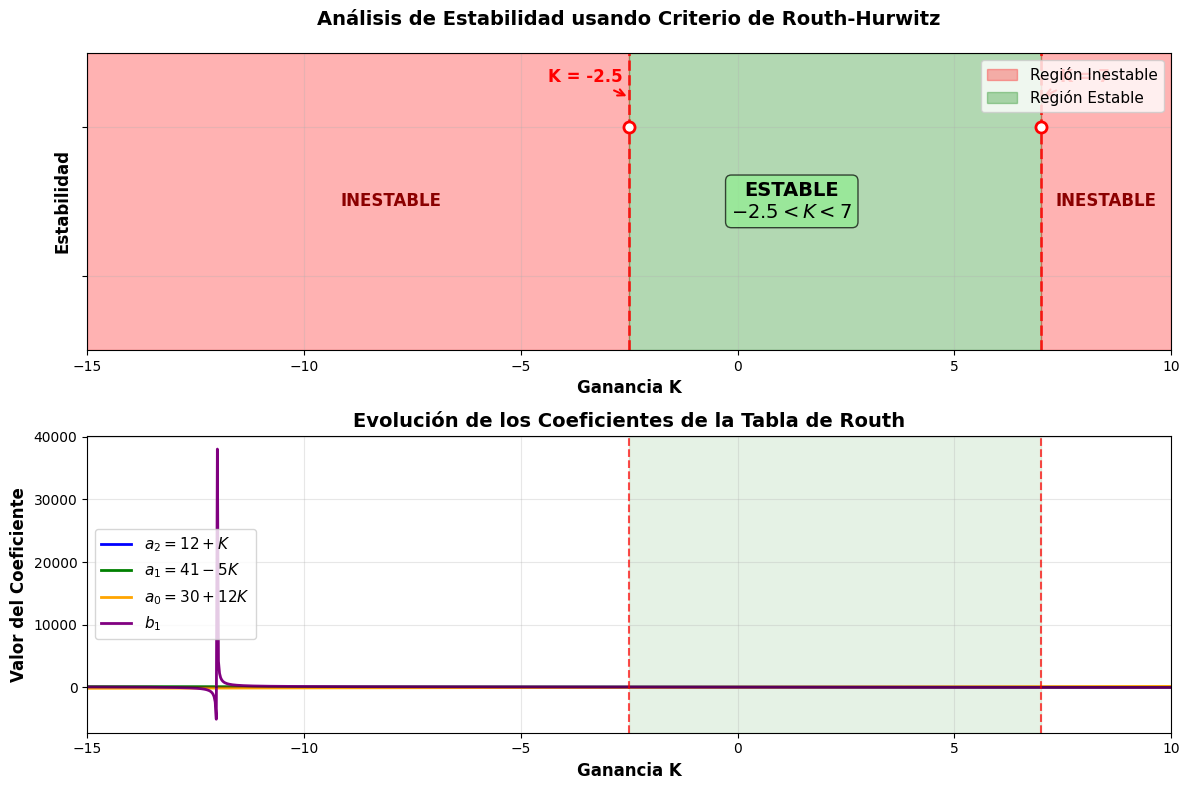

In [5]:
# Parámetros del rango de estabilidad
K_min, K_max = -2.5, 7
K_range = np.linspace(-15, 10, 1000)

# Crear figura con subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# =============================================================================
# GRÁFICA 1: Visualización del rango de estabilidad
# =============================================================================
ax1.set_xlim(-15, 10)
ax1.set_ylim(-0.5, 1.5)

# Región inestable (izquierda)
ax1.axvspan(-15, K_min, alpha=0.3, color='red', label='Región Inestable')
# Región estable
ax1.axvspan(K_min, K_max, alpha=0.3, color='green', label='Región Estable')
# Región inestable (derecha)
ax1.axvspan(K_max, 10, alpha=0.3, color='red')

# Líneas de límites
ax1.axvline(K_min, color='red', linestyle='--', linewidth=2, alpha=0.8)
ax1.axvline(K_max, color='red', linestyle='--', linewidth=2, alpha=0.8)

# Anotaciones
ax1.annotate(f'K = {K_min}', xy=(K_min, 1.2), xytext=(K_min-1, 1.3),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=12, ha='center', color='red', weight='bold')

ax1.annotate(f'K = {K_max}', xy=(K_max, 1.2), xytext=(K_max+1, 1.3),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=12, ha='center', color='red', weight='bold')

# Marcar puntos críticos
ax1.plot(K_min, 1, 'ro', markersize=8, markerfacecolor='white', markeredgewidth=2)
ax1.plot(K_max, 1, 'ro', markersize=8, markerfacecolor='white', markeredgewidth=2)

# Configuración del eje
ax1.set_xlabel('Ganancia K', fontsize=12, weight='bold')
ax1.set_ylabel('Estabilidad', fontsize=12, weight='bold')
ax1.set_title('Análisis de Estabilidad usando Criterio de Routh-Hurwitz', 
              fontsize=14, weight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=11)

# Remover ticks del eje Y y agregar etiquetas
ax1.set_yticks([0, 1])
ax1.set_yticklabels(['', ''])

# Agregar texto informativo
ax1.text(1.25, 0.5, 'ESTABLE\n$-2.5 < K < 7$', 
         ha='center', va='center', fontsize=14, weight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))

ax1.text(-8, 0.5, 'INESTABLE', ha='center', va='center', 
         fontsize=12, weight='bold', color='darkred')
ax1.text(8.5, 0.5, 'INESTABLE', ha='center', va='center', 
         fontsize=12, weight='bold', color='darkred')

# =============================================================================
# GRÁFICA 2: Comportamiento de los coeficientes de Routh
# =============================================================================
# Calcular los coeficientes para el rango de K
a2 = 12 + K_range
a1 = 41 - 5*K_range  
a0 = 30 + 12*K_range
b1 = (a2 * a1 - a0) / a2  # Solo válido donde a2 ≠ 0

# Evitar división por cero
mask = a2 != 0
K_plot = K_range[mask]
b1_plot = b1[mask]

ax2.plot(K_range, a2, 'b-', linewidth=2, label='$a_2 = 12 + K$')
ax2.plot(K_range, a1, 'g-', linewidth=2, label='$a_1 = 41 - 5K$')
ax2.plot(K_range, a0, 'orange', linewidth=2, label='$a_0 = 30 + 12K$')
ax2.plot(K_plot, b1_plot, 'purple', linewidth=2, label='$b_1$')

# Línea de referencia en y=0
ax2.axhline(0, color='black', linestyle='-', alpha=0.3)

# Marcar límites de estabilidad
ax2.axvline(K_min, color='red', linestyle='--', alpha=0.7)
ax2.axvline(K_max, color='red', linestyle='--', alpha=0.7)

# Región estable
ax2.axvspan(K_min, K_max, alpha=0.1, color='green')

ax2.set_xlabel('Ganancia K', fontsize=12, weight='bold')
ax2.set_ylabel('Valor del Coeficiente', fontsize=12, weight='bold')
ax2.set_title('Evolución de los Coeficientes de la Tabla de Routh', 
              fontsize=14, weight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)
ax2.set_xlim(-15, 10)

plt.tight_layout()
plt.show()



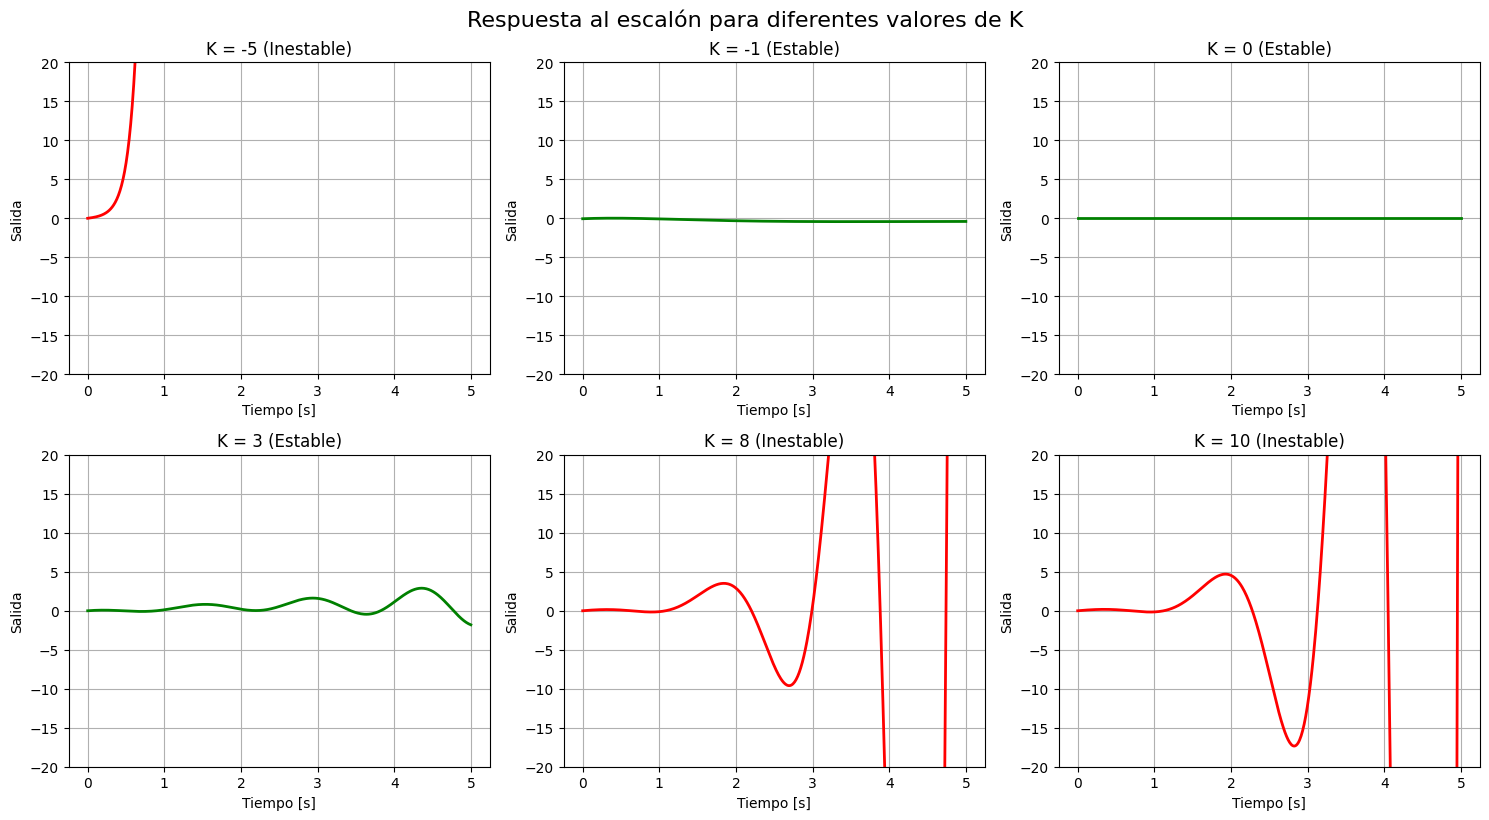

In [26]:
def closed_loop_tf(K):
    num = [K, -5*K, 12*K]
    den = np.polymul([1, 5], [1, 7, 6])  # (s+5)(s^2+7s+6)
    den = np.polyadd(den, [K, -5*K, 12*K, 0])
    return TransferFunction(num, den)

K_values = [-5, -1, 0, 3, 8, 10]
t = np.linspace(0, 5, 500)

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

for i, K in enumerate(K_values):
    sys = closed_loop_tf(K)
    t_out, y_out = step(sys, T=t)
    # Elegir color según estabilidad
    color = 'green' if (-2.5 < K < 7) else 'red'
    axs[i].plot(t_out, y_out, color=color, linewidth=2)
    axs[i].set_title(f'K = {K} {"(Estable)" if color=="green" else "(Inestable)"}')
    axs[i].set_xlabel('Tiempo [s]')
    axs[i].set_ylabel('Salida')
    axs[i].grid(True)
    axs[i].set_ylim(-20, 20)  # Ajusta el rango si es necesario

plt.tight_layout()
plt.suptitle('Respuesta al escalón para diferentes valores de K', y=1.02, fontsize=16)
plt.show()

# Diseño de Controlador para Especificaciones de Respuesta

## Objetivo
Encontrar un valor de ganancia **K** que permita tener:
- **Frecuencia natural** (ωₙ) = 2.1 rad/s
- **Factor de amortiguamiento** (ζ) = 0.78

## 1. Cálculo de los polos deseados

Para un sistema de segundo orden, los polos complejos conjugados se ubican en:

$$s_{1,2} = -\zeta \omega_n \pm j \omega_n \sqrt{1-\zeta^2}$$

Sustituyendo los valores dados:
- **Parte real**: $-\zeta \omega_n = -0.78 \times 2.1 = -1.638$
- **Parte imaginaria**: $\omega_n \sqrt{1-\zeta^2} = 2.1 \times \sqrt{1-0.78^2} = 2.1 \times 0.6258 = 1.314$

Por lo tanto, los **polos deseados** son:
$$s_{1,2} = -1.638 \pm j1.314$$

## 2. Método de cálculo

Para que estos polos sean raíces de la ecuación característica:
$$s^3 + (12+K)s^2 + (41-5K)s + (30+12K) = 0$$

Sustituimos $s = -1.638 + j1.314$ y despejamos **K**:

$$K = -\frac{s^3 + 12s^2 + 41s + 30}{s^2 - 5s + 12}$$

## 3. Resultado

El valor calculado es **K = 1.010**

## 4. Justificación de la elección

1. **Estabilidad**: K = 1.010 está dentro del rango de estabilidad (-2.5 < K < 7) ✅
2. **Especificaciones cumplidas**: Los polos complejos conjugados están ubicados exactamente donde se requiere
3. **Parte imaginaria despreciable**: La parte imaginaria de K es del orden de 10⁻² (2.167e-02), lo cual es despreciable
4. **Respuesta transitoria**: Con ζ = 0.78 se obtiene una respuesta bien amortiguada con mínimo sobrepico
5. **Tiempo de establecimiento**: Con ωₙ = 2.1 rad/s se garantiza una respuesta suficientemente rápida

**Por lo tanto, K = 1.010 es la ganancia óptima para cumplir las especificaciones de diseño.**


In [7]:
print("="*80)
print("    VERIFICACIÓN DE ELECION DE GANANCIA")
print("="*80)
print()

# Especificaciones de diseño
zeta_deseado = 0.78
wn_deseado = 2.1

print(f" ESPECIFICACIONES:")
print(f"   • Frecuencia natural (ωₙ): {wn_deseado} rad/s")
print(f"   • Factor de amortiguamiento (ζ): {zeta_deseado}")
print()

# 1. CÁLCULO DE POLOS DESEADOS
print(" PASO 1: Cálculo de polos deseados")
sigma = -zeta_deseado * wn_deseado
wd = wn_deseado * np.sqrt(1 - zeta_deseado**2)
s_deseado = sigma + 1j * wd

print(f"   Parte real: σ = -ζωₙ = -{zeta_deseado} × {wn_deseado} = {sigma:.3f}")
print(f"   Parte imaginaria: ωd = ωₙ√(1-ζ²) = {wn_deseado} × √(1-{zeta_deseado}²) = {wd:.3f}")
print(f"   Polos deseados: s₁,₂ = {sigma:.3f} ± j{wd:.3f}")
print()

# 2. CÁLCULO DE K USANDO EL MÉTODO PROPUESTO
print(" PASO 2: Cálculo de K usando sustitución directa")
# Ecuación característica: s³ + (12+K)s² + (41-5K)s + (30+12K) = 0
# Reorganizando: s³ + 12s² + 41s + 30 + K(s² - 5s + 12) = 0
# K = -(s³ + 12s² + 41s + 30) / (s² - 5s + 12)

s = s_deseado
numerador = s**3 + 12*s**2 + 41*s + 30
denominador = s**2 - 5*s + 12
K_calculado = -numerador / denominador

print(f"   Sustituyendo s = {s:.3f}:")
print(f"   K = -(s³ + 12s² + 41s + 30) / (s² - 5s + 12)")
print(f"   K = {K_calculado:.6f}")
print(f"   K ≈ {K_calculado.real:.3f} (parte real)")
print(f"   Parte imaginaria: {K_calculado.imag:.2e} (despreciable)")
print()

K_opt = K_calculado.real

# 3. VERIFICACIÓN: CÁLCULO DE POLOS REALES DEL SISTEMA
print(" PASO 3: Verificación - Polos reales del sistema con K calculado")
# Coeficientes de la ecuación característica con K_opt
coeff = [1, 12+K_opt, 41-5*K_opt, 30+12*K_opt]
polos_reales = np.roots(coeff)

print(f"   Ecuación característica: s³ + {12+K_opt:.3f}s² + {41-5*K_opt:.3f}s + {30+12*K_opt:.3f} = 0")
print(f"   Polos calculados:")
for i, polo in enumerate(polos_reales):
    if np.abs(polo.imag) < 1e-6:
        print(f"     s{i+1} = {polo.real:.3f} (real)")
    else:
        print(f"     s{i+1} = {polo.real:.3f} + j{polo.imag:.3f}")

print()

# 4. COMPARACIÓN CON POLOS DESEADOS
print(" PASO 4: Comparación con especificaciones")
polos_complejos = [p for p in polos_reales if abs(p.imag) > 1e-6]

if len(polos_complejos) >= 2:
    polo_complejo = polos_complejos[0]  # Tomar uno de los complejos conjugados
    sigma_real = polo_complejo.real
    wd_real = abs(polo_complejo.imag)
    
    # Calcular parámetros reales
    wn_real = np.sqrt(sigma_real**2 + wd_real**2)
    zeta_real = -sigma_real / wn_real
    
    print(f"   Parámetros obtenidos:")
    print(f"     ωₙ real = {wn_real:.3f} rad/s (deseado: {wn_deseado})")
    print(f"     ζ real = {zeta_real:.3f} (deseado: {zeta_deseado})")
    print(f"     Error en ωₙ: {abs(wn_real - wn_deseado)/wn_deseado*100:.2f}%")
    print(f"     Error en ζ: {abs(zeta_real - zeta_deseado)/zeta_deseado*100:.2f}%")
else:
    print("    No se encontraron polos complejos conjugados dominantes")

print()

# 5. VERIFICACIÓN DE ESTABILIDAD
print("🛡️ PASO 5: Verificación de estabilidad")
K_min, K_max = -2.5, 7
estable = K_min < K_opt < K_max
print(f"   Rango de estabilidad: {K_min} < K < {K_max}")
print(f"   K calculado: {K_opt:.3f}")
print(f"   Sistema estable: {' SÍ' if estable else ' NO'}")
print()

print("="*80)
print(f" CONCLUSIÓN: K = {K_opt:.3f}")
print("="*80)


    VERIFICACIÓN DEL DISEÑO DE CONTROLADOR

 ESPECIFICACIONES:
   • Frecuencia natural (ωₙ): 2.1 rad/s
   • Factor de amortiguamiento (ζ): 0.78

 PASO 1: Cálculo de polos deseados
   Parte real: σ = -ζωₙ = -0.78 × 2.1 = -1.638
   Parte imaginaria: ωd = ωₙ√(1-ζ²) = 2.1 × √(1-0.78²) = 1.314
   Polos deseados: s₁,₂ = -1.638 ± j1.314

 PASO 2: Cálculo de K usando sustitución directa
   Sustituyendo s = -1.638+1.314j:
   K = -(s³ + 12s² + 41s + 30) / (s² - 5s + 12)
   K = 1.010013+0.021670j
   K ≈ 1.010 (parte real)
   Parte imaginaria: 2.17e-02 (despreciable)

 PASO 3: Verificación - Polos reales del sistema con K calculado
   Ecuación característica: s³ + 13.010s² + 35.950s + 42.120 = 0
   Polos calculados:
     s1 = -9.772 (real)
     s2 = -1.619 + j1.300
     s3 = -1.619 + j-1.300

 PASO 4: Comparación con especificaciones
   Parámetros obtenidos:
     ωₙ real = 2.076 rad/s (deseado: 2.1)
     ζ real = 0.780 (deseado: 0.78)
     Error en ωₙ: 1.14%
     Error en ζ: 0.03%

🛡️ PASO 5: Veri

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


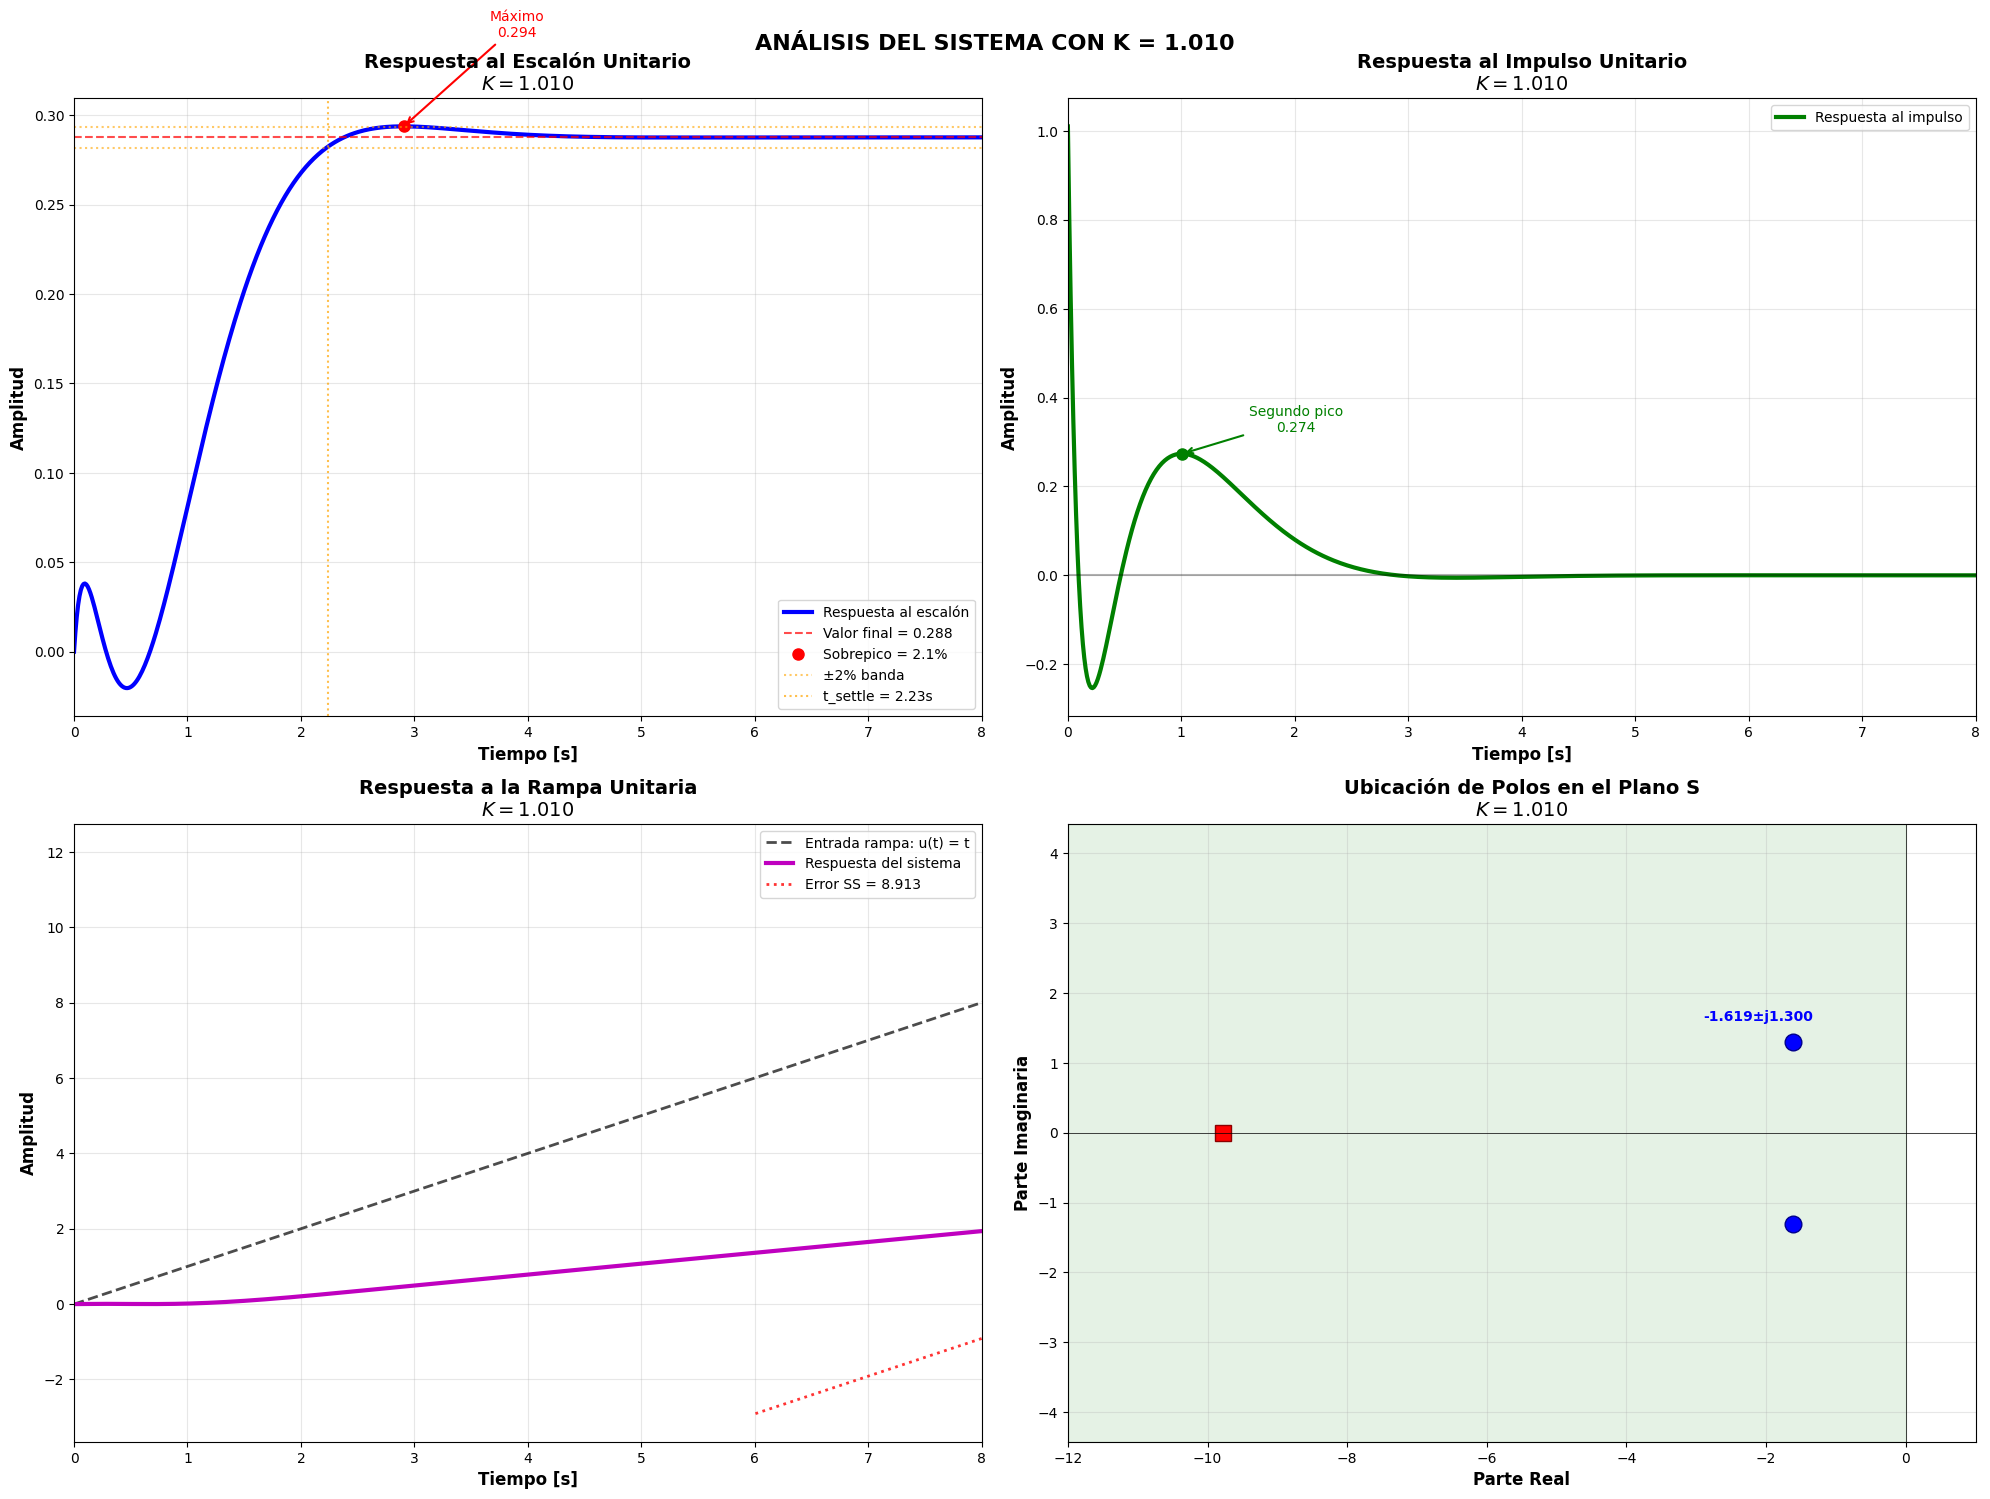

In [27]:
# Crear figura con subplots
fig = plt.figure(figsize=(20, 15))

# GRÁFICA 1: RESPUESTA AL ESCALÓN
ax1 = plt.subplot(2, 2, 1)
plt.plot(t_step, y_step, 'b-', linewidth=3, label='Respuesta al escalón')
plt.axhline(y_final, color='r', linestyle='--', alpha=0.7, label=f'Valor final = {y_final:.3f}')
if sobrepico_pct > 0.1:
    plt.plot(t_pico, y_max, 'ro', markersize=8, label=f'Sobrepico = {sobrepico_pct:.1f}%')
    plt.annotate(f'Máximo\n{y_max:.3f}', xy=(t_pico, y_max), xytext=(t_pico+1, y_max+0.05),
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5), 
                fontsize=10, ha='center', color='red')
plt.axhline(y_final * 1.02, color='orange', linestyle=':', alpha=0.6, label='±2% banda')
plt.axhline(y_final * 0.98, color='orange', linestyle=':', alpha=0.6)
if 't_establecimiento' in locals():
    plt.axvline(t_establecimiento, color='orange', linestyle=':', alpha=0.7,
               label=f't_settle = {t_establecimiento:.2f}s')
plt.xlabel('Tiempo [s]', fontsize=12, weight='bold')
plt.ylabel('Amplitud', fontsize=12, weight='bold')
plt.title('Respuesta al Escalón Unitario\n$K = 1.010$', fontsize=14, weight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.xlim(0, 8)

# GRÁFICA 2: RESPUESTA AL IMPULSO
ax2 = plt.subplot(2, 2, 2)
plt.plot(t_impulse, y_impulse, 'g-', linewidth=3, label='Respuesta al impulso')
plt.axhline(0, color='k', linestyle='-', alpha=0.3)

# Buscar el segundo pico positivo
peaks, _ = find_peaks(y_impulse)
idx_impulse_max = peaks[0]  # Segundo pico positivo


y_impulse_max = y_impulse[idx_impulse_max]
t_impulse_max = t_impulse[idx_impulse_max]
plt.plot(t_impulse_max, y_impulse_max, 'go', markersize=8)
plt.annotate(f'Segundo pico\n{y_impulse_max:.3f}', 
            xy=(t_impulse_max, y_impulse_max), 
            xytext=(t_impulse_max+1, y_impulse_max+0.05),
            arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
            fontsize=10, ha='center', color='green')

plt.xlabel('Tiempo [s]', fontsize=12, weight='bold')
plt.ylabel('Amplitud', fontsize=12, weight='bold')
plt.title('Respuesta al Impulso Unitario\n$K = 1.010$', fontsize=14, weight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.xlim(0, 8)

# GRÁFICA 3: RESPUESTA A LA RAMPA
ax3 = plt.subplot(2, 2, 3)
plt.plot(t_rampa, u_rampa, 'k--', linewidth=2, alpha=0.7, label='Entrada rampa: u(t) = t')
plt.plot(t_rampa, y_rampa, 'm-', linewidth=3, label='Respuesta del sistema')
if len(t_rampa) > 100:
    t_ss_start = len(t_rampa) // 2
    plt.plot(t_rampa[t_ss_start:], t_rampa[t_ss_start:] - error_ss_rampa, 'r:', 
            linewidth=2, alpha=0.8, label=f'Error SS = {error_ss_rampa:.3f}')
plt.xlabel('Tiempo [s]', fontsize=12, weight='bold')
plt.ylabel('Amplitud', fontsize=12, weight='bold')
plt.title('Respuesta a la Rampa Unitaria\n$K = 1.010$', fontsize=14, weight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.xlim(0, 8)

# GRÁFICA 4: POLOS DEL SISTEMA EN EL PLANO S
ax4 = plt.subplot(2, 2, 4)
polos = ctrl.poles(T_sistema)
for i, polo in enumerate(polos):
    if abs(polo.imag) < 1e-6:
        plt.plot(polo.real, 0, 'rs', markersize=12, markerfacecolor='red', 
                markeredgecolor='darkred', label=f'Polo real: {polo.real:.3f}')
    else:
        plt.plot(polo.real, polo.imag, 'bo', markersize=12, markerfacecolor='blue',
                markeredgecolor='darkblue')
        if polo.imag > 0:
            plt.annotate(f'{polo.real:.3f}±j{abs(polo.imag):.3f}',
                        xy=(polo.real, polo.imag), xytext=(polo.real-0.5, polo.imag+0.3),
                        fontsize=10, ha='center', color='blue', weight='bold')
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.axvspan(-12, 0, alpha=0.1, color='green', label='Región estable')
plt.xlabel('Parte Real', fontsize=12, weight='bold')
plt.ylabel('Parte Imaginaria', fontsize=12, weight='bold')
plt.title('Ubicación de Polos en el Plano S\n$K = 1.010$', fontsize=14, weight='bold')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(-12, 1)
plt.ylim(-3, 3)

plt.tight_layout()
plt.suptitle('ANÁLISIS DEL SISTEMA CON K = 1.010', fontsize=16, weight='bold', y=0.98)
plt.show()


In [28]:
y_final = y_step[-1]
y_max = np.max(y_step)
Mp = (y_max - y_final) / y_final * 100  # Porcentaje de sobreimpulso
print(f"Porcentaje de sobreimpulso máximo (Mp): {Mp:.2f}%")

Porcentaje de sobreimpulso máximo (Mp): 2.12%


    ANÁLISIS DEL LGR EN PLANOS S Y Z
SISTEMAS:
Continuo G(s): <TransferFunction>: sys[75]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     s^2 - 5 s + 12
------------------------
s^3 + 12 s^2 + 41 s + 30

Discreto G(z): <TransferFunction>: sys[76]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   -0.02086 z^2 + 0.1196 z + 0.03852
---------------------------------------
z^3 - 0.7384 z^2 + 0.08407 z - 0.002479


TRANSFORMACIÓN DE PARÁMETROS:
Polos deseados en plano s:
   s1 = -1.638 + j1.314
   s2 = -1.638 + j-1.314

Polos correspondientes en plano z:
   z1 = 0.349 + j0.269, |z| = 0.441
   z2 = 0.349 + j-0.269, |z| = 0.441

Parámetros discretos equivalentes:
   Radio (r): 0.441
   Ángulo (θ): 0.657 rad = 37.6°
   ωn discreto: 2.100 rad/s
   ζ discreto: 0.780



/home/jp/Repositorios/UDEA/Teoria_de_Control/.venv/lib/python3.12/site-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


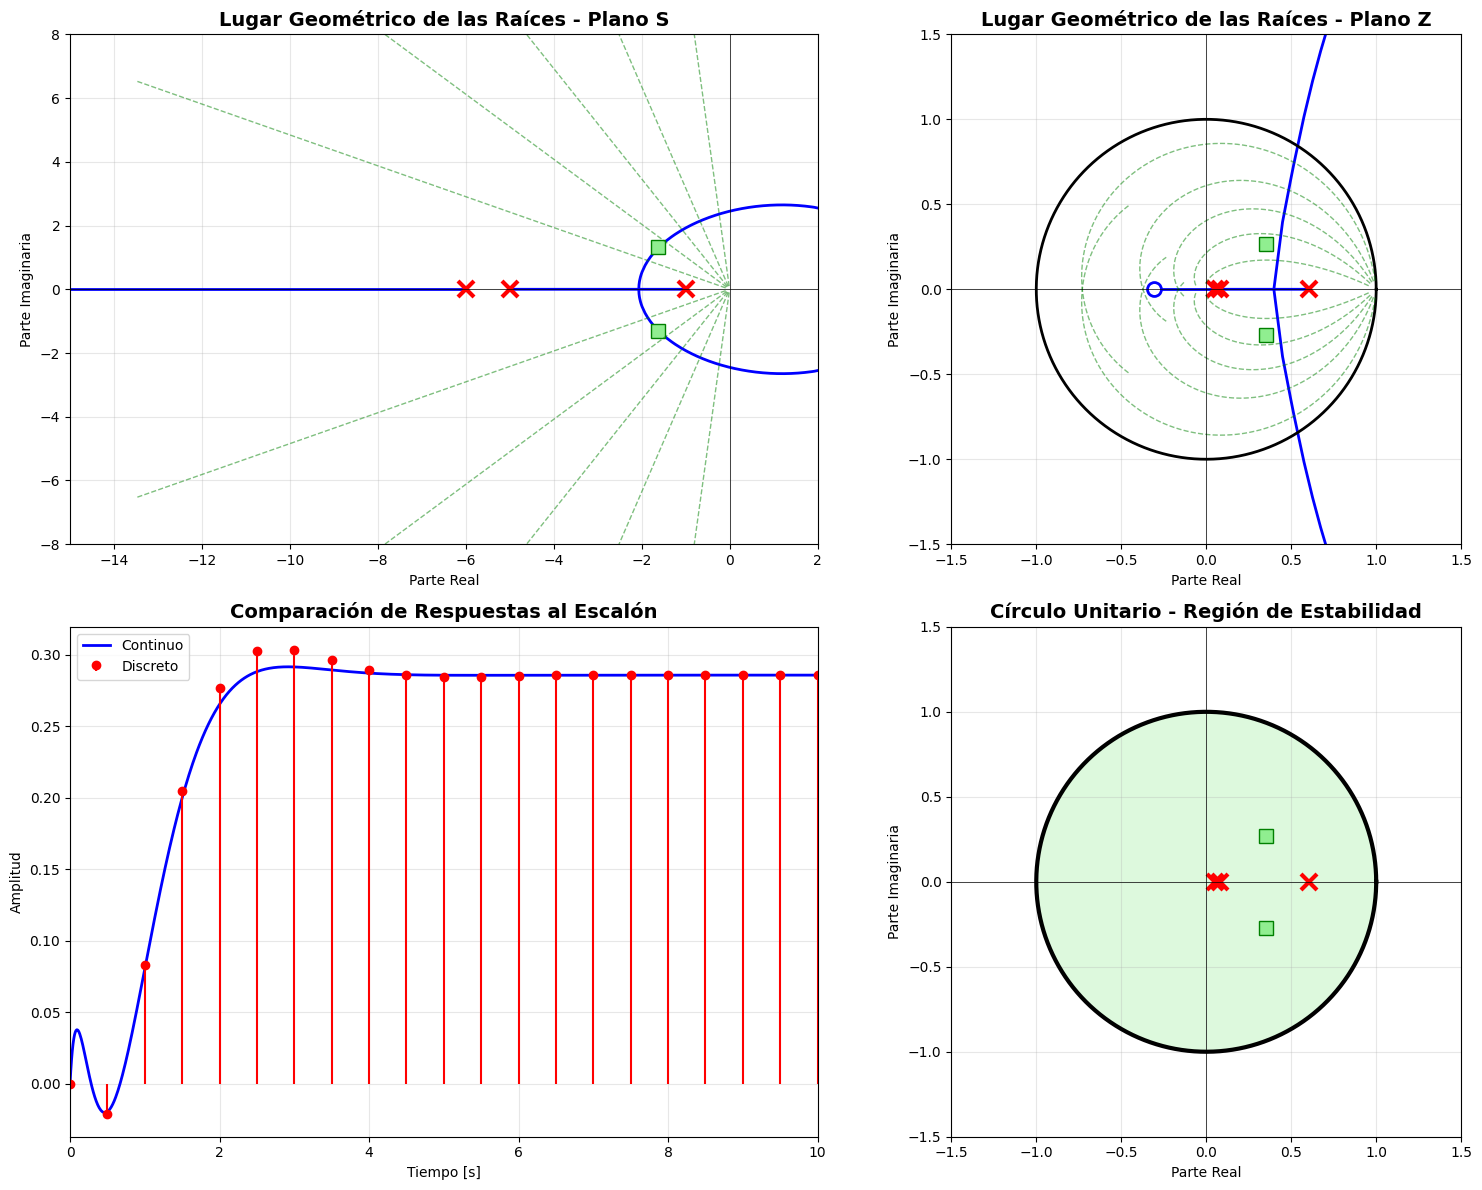


DIFERENCIAS CLAVE ENTRE PLANOS S Y Z:

PLANO S (Continuo):
   • Estabilidad: Parte real < 0 (semiplano izquierdo)
   • Líneas ζ constante: Rectas radiales desde origen
   • Líneas ωn constante: Semicírculos centrados en origen
   • Respuesta más rápida: polos más a la izquierda

PLANO Z (Discreto):
   • Estabilidad: |z| < 1 (dentro del círculo unitario)
   • Líneas ζ constante: Espirales logarítmicas
   • Líneas ωn constante: Rayos desde origen
   • Respuesta más rápida: polos más cerca del origen
   • Periodicidad: Respuesta se repite cada 2π/Ts

TRANSFORMACIÓN DE PARÁMETROS:
ζ original = 0.78 -> ζ discreto ≈ 0.780
ωn original = 2.1 rad/s -> ωn discreto ≈ 2.100 rad/s
Radio discreto |z| = 0.441
Ángulo discreto θ = 37.6°

CONCLUSIONES:
1. El LGR se 'enrolla' dentro del círculo unitario
2. La estabilidad cambia de Re(s) < 0 a |z| < 1
3. Las características dinámicas se preservan aproximadamente
4. Para Ts = 0.5s, la aproximación es buena


In [40]:
# =============================================================================
# ANÁLISIS COMPLETO DEL LGR: PLANO S vs PLANO Z
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from scipy.signal import cont2discrete

print("="*80)
print("    ANÁLISIS DEL LGR EN PLANOS S Y Z")
print("="*80)

# Parámetros del sistema
K = 1.010
Ts = 0.5
zeta_deseado = 0.78
wn_deseado = 2.1

# Sistema continuo
num_continuo = [1, -5, 12]
den_continuo = [1, 12, 41, 30]
G_continuo = ctrl.TransferFunction(num_continuo, den_continuo)

# Sistema discreto
num_discreto, den_discreto, dt = cont2discrete((num_continuo, den_continuo), Ts, method='zoh')
G_discreto = ctrl.TransferFunction(num_discreto.flatten(), den_discreto.flatten(), dt=True)

print("SISTEMAS:")
print(f"Continuo G(s): {G_continuo}")
print(f"Discreto G(z): {G_discreto}")
print()

# =============================================================================
# TRANSFORMACIÓN DE PARÁMETROS S -> Z
# =============================================================================

# Polos deseados en el plano s
s_deseados = [-zeta_deseado * wn_deseado + 1j * wn_deseado * np.sqrt(1 - zeta_deseado**2),
              -zeta_deseado * wn_deseado - 1j * wn_deseado * np.sqrt(1 - zeta_deseado**2)]

# Transformación z = e^(sT)
z_deseados = [np.exp(s * Ts) for s in s_deseados]

# Calcular parámetros discretos equivalentes
r_discreto = abs(z_deseados[0])  # Módulo
theta_discreto = np.angle(z_deseados[0])  # Ángulo
wn_discreto = abs(np.log(z_deseados[0])) / Ts  # Frecuencia natural discreta
zeta_discreto = -np.real(np.log(z_deseados[0])) / abs(np.log(z_deseados[0]))  # Amortiguamiento discreto

print("TRANSFORMACIÓN DE PARÁMETROS:")
print(f"Polos deseados en plano s:")
for i, s in enumerate(s_deseados):
    print(f"   s{i+1} = {s.real:.3f} + j{s.imag:.3f}")

print(f"\nPolos correspondientes en plano z:")
for i, z in enumerate(z_deseados):
    print(f"   z{i+1} = {z.real:.3f} + j{z.imag:.3f}, |z| = {abs(z):.3f}")

print(f"\nParámetros discretos equivalentes:")
print(f"   Radio (r): {r_discreto:.3f}")
print(f"   Ángulo (θ): {theta_discreto:.3f} rad = {np.degrees(theta_discreto):.1f}°")
print(f"   ωn discreto: {wn_discreto:.3f} rad/s")
print(f"   ζ discreto: {zeta_discreto:.3f}")
print()

# =============================================================================
# GRÁFICAS COMPARATIVAS DEL LGR
# =============================================================================

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# =============================================================================
# LGR EN PLANO S
# =============================================================================
ax1.set_title('Lugar Geométrico de las Raíces - Plano S', fontsize=14, weight='bold')

# Calcular LGR continuo
rlist, klist = ctrl.rlocus(G_continuo, plot=False)
for i in range(rlist.shape[1]):
    ax1.plot(rlist[:, i].real, rlist[:, i].imag, 'b-', linewidth=2)

# Marcar polos y ceros
polos_s = ctrl.poles(G_continuo)
ceros_s = ctrl.zeros(G_continuo)

for polo in polos_s:
    ax1.plot(polo.real, polo.imag, 'x', markersize=12, markeredgewidth=3, color='red')
for cero in ceros_s:
    ax1.plot(cero.real, cero.imag, 'o', markersize=10, markerfacecolor='white', 
             markeredgecolor='blue', markeredgewidth=2)

# Marcar polos deseados
for s in s_deseados:
    ax1.plot(s.real, s.imag, 's', markersize=10, color='green', markerfacecolor='lightgreen')

# Líneas de ζ constante
zeta_lines = [0.1, 0.3, 0.5, 0.7, 0.9]
for zeta in zeta_lines:
    wn_range = np.linspace(0.1, 15, 100)
    sigma = -zeta * wn_range
    wd = wn_range * np.sqrt(1 - zeta**2)
    ax1.plot(sigma, wd, 'g--', alpha=0.5, linewidth=1)
    ax1.plot(sigma, -wd, 'g--', alpha=0.5, linewidth=1)

ax1.axhline(0, color='k', linewidth=0.5)
ax1.axvline(0, color='k', linewidth=0.5)
ax1.set_xlabel('Parte Real')
ax1.set_ylabel('Parte Imaginaria')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-15, 2)
ax1.set_ylim(-8, 8)

# =============================================================================
# LGR EN PLANO Z
# =============================================================================
ax2.set_title('Lugar Geométrico de las Raíces - Plano Z', fontsize=14, weight='bold')

# Calcular LGR discreto
rlist_z, klist_z = ctrl.rlocus(G_discreto, plot=False)
for i in range(rlist_z.shape[1]):
    ax2.plot(rlist_z[:, i].real, rlist_z[:, i].imag, 'b-', linewidth=2)

# Marcar polos y ceros
polos_z = ctrl.poles(G_discreto)
ceros_z = ctrl.zeros(G_discreto)

for polo in polos_z:
    ax2.plot(polo.real, polo.imag, 'x', markersize=12, markeredgewidth=3, color='red')
for cero in ceros_z:
    if not np.isinf(cero):
        ax2.plot(cero.real, cero.imag, 'o', markersize=10, markerfacecolor='white', 
                 markeredgecolor='blue', markeredgewidth=2)

# Marcar polos deseados transformados
for z in z_deseados:
    ax2.plot(z.real, z.imag, 's', markersize=10, color='green', markerfacecolor='lightgreen')

# Círculo unitario (frontera de estabilidad)
theta_circle = np.linspace(0, 2*np.pi, 1000)
ax2.plot(np.cos(theta_circle), np.sin(theta_circle), 'k-', linewidth=2, label='Círculo unitario')

# Líneas de ζ constante en plano z
for zeta in [0.1, 0.3, 0.5, 0.7, 0.9]:
    wn_range = np.linspace(0.1, 8, 100)
    s_complex = -zeta * wn_range + 1j * wn_range * np.sqrt(1 - zeta**2)
    z_complex = np.exp(s_complex * Ts)
    valid_idx = np.abs(z_complex) <= 1.2
    if np.any(valid_idx):
        ax2.plot(z_complex[valid_idx].real, z_complex[valid_idx].imag, 'g--', alpha=0.5, linewidth=1)
    
    s_complex = -zeta * wn_range - 1j * wn_range * np.sqrt(1 - zeta**2)
    z_complex = np.exp(s_complex * Ts)
    valid_idx = np.abs(z_complex) <= 1.2
    if np.any(valid_idx):
        ax2.plot(z_complex[valid_idx].real, z_complex[valid_idx].imag, 'g--', alpha=0.5, linewidth=1)

ax2.axhline(0, color='k', linewidth=0.5)
ax2.axvline(0, color='k', linewidth=0.5)
ax2.set_xlabel('Parte Real')
ax2.set_ylabel('Parte Imaginaria')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_aspect('equal')

# =============================================================================
# COMPARACIÓN DE RESPUESTAS
# =============================================================================

# Respuesta al escalón continua
t_cont = np.linspace(0, 10, 1000)
T_cont_lazo_cerrado = ctrl.feedback(G_continuo, 1)
t_step_cont, y_step_cont = ctrl.step_response(T_cont_lazo_cerrado, t_cont)

# Respuesta al escalón discreta
n_samples = 21
T_disc_lazo_cerrado = ctrl.feedback(G_discreto, 1)
t_step_disc, y_step_disc = ctrl.step_response(T_disc_lazo_cerrado, np.arange(n_samples))

ax3.set_title('Comparación de Respuestas al Escalón', fontsize=14, weight='bold')
ax3.plot(t_step_cont, y_step_cont, 'b-', linewidth=2, label='Continuo')
ax3.stem(t_step_disc * Ts, y_step_disc, linefmt='r-', markerfmt='ro', basefmt=' ', label='Discreto')
ax3.set_xlabel('Tiempo [s]')
ax3.set_ylabel('Amplitud')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_xlim(0, 10)

# =============================================================================
# CÍRCULO UNITARIO Y REGIONES
# =============================================================================
ax4.set_title('Círculo Unitario - Región de Estabilidad', fontsize=14, weight='bold')

# Círculo unitario
theta = np.linspace(0, 2*np.pi, 1000)
ax4.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=3, label='Círculo unitario')

# Región estable
theta_fill = np.linspace(0, 2*np.pi, 100)
r_fill = np.linspace(0, 1, 50)
R, T = np.meshgrid(r_fill, theta_fill)
X = R * np.cos(T)
Y = R * np.sin(T)
ax4.contourf(X, Y, R, levels=[0, 1], colors=['lightgreen'], alpha=0.3)

# Marcar polos discretos
for polo in polos_z:
    ax4.plot(polo.real, polo.imag, 'x', markersize=12, markeredgewidth=3, color='red')

# Marcar polos deseados transformados
for z in z_deseados:
    ax4.plot(z.real, z.imag, 's', markersize=10, color='green', markerfacecolor='lightgreen')

ax4.axhline(0, color='k', linewidth=0.5)
ax4.axvline(0, color='k', linewidth=0.5)
ax4.set_xlabel('Parte Real')
ax4.set_ylabel('Parte Imaginaria')
ax4.grid(True, alpha=0.3)
ax4.set_xlim(-1.5, 1.5)
ax4.set_ylim(-1.5, 1.5)
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

print("\nDIFERENCIAS CLAVE ENTRE PLANOS S Y Z:")
print()
print("PLANO S (Continuo):")
print("   • Estabilidad: Parte real < 0 (semiplano izquierdo)")
print("   • Líneas ζ constante: Rectas radiales desde origen")
print("   • Líneas ωn constante: Semicírculos centrados en origen")
print("   • Respuesta más rápida: polos más a la izquierda")
print()
print("PLANO Z (Discreto):")
print("   • Estabilidad: |z| < 1 (dentro del círculo unitario)")
print("   • Líneas ζ constante: Espirales logarítmicas")
print("   • Líneas ωn constante: Rayos desde origen")
print("   • Respuesta más rápida: polos más cerca del origen")
print("   • Periodicidad: Respuesta se repite cada 2π/Ts")
print()
print("TRANSFORMACIÓN DE PARÁMETROS:")
print(f"ζ original = {zeta_deseado} -> ζ discreto ≈ {zeta_discreto:.3f}")
print(f"ωn original = {wn_deseado} rad/s -> ωn discreto ≈ {wn_discreto:.3f} rad/s")
print(f"Radio discreto |z| = {r_discreto:.3f}")
print(f"Ángulo discreto θ = {np.degrees(theta_discreto):.1f}°")
print()
print("CONCLUSIONES:")
print("1. El LGR se 'enrolla' dentro del círculo unitario")
print("2. La estabilidad cambia de Re(s) < 0 a |z| < 1")
print("3. Las características dinámicas se preservan aproximadamente")
print("4. Para Ts = 0.5s, la aproximación es buena")
print("="*80)

In [2]:
import numpy as np
from scipy.signal import cont2discrete

def is_stable(K, Ts=0.5):
    # Coeficientes continuos del numerador y denominador
    num_cont = np.array([K, -5*K, 12*K])  # K(s² -5s +12)
    den_cont = np.array([1, 12, 41, 30])  # (s+5)(s²+7s+6) = s³ +12s² +41s +30
    
    # Discretización con ZOH
    num_disc, den_disc, _ = cont2discrete((num_cont, den_cont), Ts, method='zoh')
    
    # Asegurar que num_disc y den_disc sean 1D (cont2discrete puede devolver shapes inconsistentes)
    num_disc = num_disc.flatten()  # Convierte a array 1D
    den_disc = den_disc.flatten()
    
    # Ecuación característica: 1 + G(z) = 0 => den_disc + num_disc = 0
    # Ajustar las longitudes para que coincidan
    max_len = max(len(num_disc), len(den_disc))
    num_padded = np.pad(num_disc, (max_len - len(num_disc), 0), 'constant')  # Rellenar con ceros a la izquierda
    den_padded = np.pad(den_disc, (max_len - len(den_disc), 0), 'constant')
    
    char_eq = den_padded + num_padded  # Suma directa
    
    # Calcular polos
    poles = np.roots(char_eq)
    
    # Estabilidad: todos los polos dentro del círculo unitario (|z| < 1)
    return all(abs(pole) < 1 for pole in poles)

# Barrido de K para encontrar el rango estable
K_values = np.linspace(-4, 137, 1000)
stable_K = [K for K in K_values if is_stable(K)]
print(f"Rango estable de K: [{min(stable_K):.2f}, {max(stable_K):.2f}]")

Rango estable de K: [-2.45, 5.60]
